In [1]:
import os
import argparse
import numpy as np
import time
import matplotlib.pyplot as pyplot

from main import run_direct_estimation, run_importance_sampling, run_adaptive_importance_sampling, run_multiple_grasps, run_single_grasp

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


pybullet build time: Oct 14 2023 16:00:51


In [2]:
# Define parameters for estimation methods
trial_size_increment = 10
max_trial_exp = 3
gui = False
hill = True
policy_file = '/Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl'
depth = 5

In [5]:
# Run direct estimation
# stores n, p_failure, std_error, runtime
results_de = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i + 1)
    p_failure_de, std_error_de = run_direct_estimation(
        trials, 
        gui,
        hill,  # Pass hill climbing flag
        policy_file if hill else None  # Pass policy file only if using hill climbing
    )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_de['n'].append(trials)
    results_de['p_fail'].append(p_failure_de)
    results_de['std_error'].append(std_error_de)
    results_de['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Failure Probability: {p_failure_de:.4f} ± {std_error_de:.4f}")
    print(f"95% Confidence Interval: [{p_failure_de - 1.96*std_error_de:.4f}, {p_failure_de + 1.96*std_error_de:.4f}]")


Running direct estimation with 10 trials...
Using hill climbing policy
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Starting direct estimation with 10 trials...
Completed 0/10 trials...

Results:
Failure Probability: 0.0000 ± 0.0000
Based on 0 failures in 10 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0000 ± 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Running direct estimation with 100 trials...
Using hill climbing policy
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Starting direct estimation with 100 trials...
Completed 0/100 trials...
Completed 50/100 trials...

Results:
Failure Probability: 0.0100 ± 0.0099
Based on 1 failures in 100 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0100 ± 0.0099
95% Confidence Interval: [-0.0095, 0.02

In [3]:
# Run importance sampling
# stores n, p_failure, std_error, runtime
results_ims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_ims['n'].append(trials)
    results_ims['p_fail'].append(failure_prob)
    results_ims['std_error'].append(std_error)
    results_ims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running importance sampling with 10 trials and depth 5...
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl


/Users/jazz/opt/anaconda3/envs/cs224n/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Estimated failure probability: 0.500000

Final Results:
Estimated Failure Probability: 0.5000
95% Confidence Interval: [0.0736, 0.9264]

Running importance sampling with 100 trials and depth 5...
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Estimated failure probability: 0.050000

Final Results:
Estimated Failure Probability: 0.0500
95% Confidence Interval: [-0.0305, 0.1305]

Running importance sampling with 1000 trials and depth 5...
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Estimated failure probability: 0.005000

Final Results:
Estimated Failure Probability: 0.0050
95% Confidence Interval: [0.0017, 0.0083]


In [4]:
# Run adaptive importance sampling
results_aims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_adaptive_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_aims['n'].append(trials)
    results_aims['p_fail'].append(failure_prob)
    results_aims['std_error'].append(std_error)
    results_aims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running adaptive importance sampling with 10 trials and depth 5...
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Completed 0/100 iterations...
Completed 10/100 iterations...
Completed 20/100 iterations...
Completed 30/100 iterations...
Completed 40/100 iterations...
Completed 50/100 iterations...
Completed 60/100 iterations...
Completed 70/100 iterations...
Completed 80/100 iterations...
Completed 90/100 iterations...
Estimated failure probability: 0.500000

Final Results:
Estimated Failure Probability: 0.5000
95% Confidence Interval: [-0.1864, 1.1864]

Running adaptive importance sampling with 100 trials and depth 5...
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Completed 0/100 iterations...
Completed 10/100 iterations...
Completed 20/100 iterations...
Completed 30/100 iterations...
Completed 40/100 iterations...
Completed 50/100 iterations...
Completed 60/100 iterations...
C

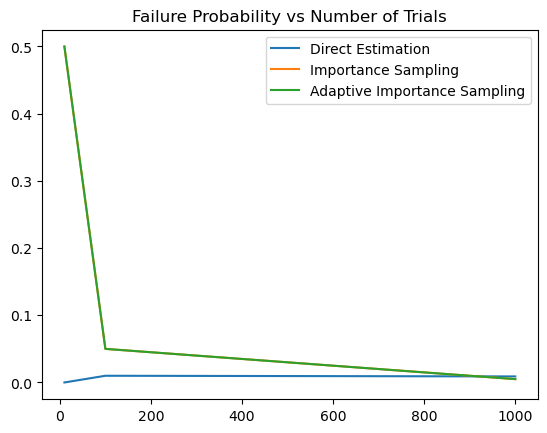

In [6]:
# failure probability graph
pyplot.plot(results_de['n'], results_de['p_fail'])
pyplot.plot(results_ims['n'], results_ims['p_fail'])
pyplot.plot(results_aims['n'], results_aims['p_fail'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Failure Probability vs Number of Trials")
pyplot.show()

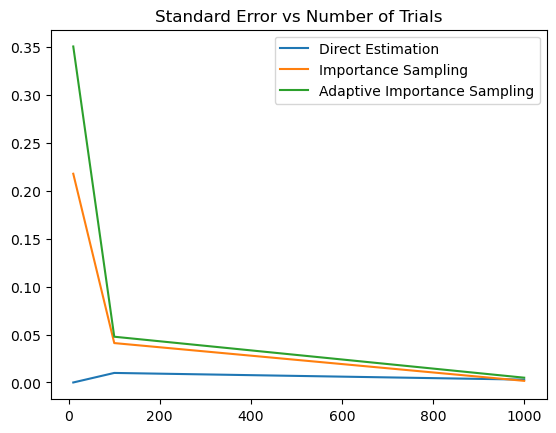

In [7]:
pyplot.plot(results_de['n'], results_de['std_error'])
pyplot.plot(results_ims['n'], results_ims['std_error'])
pyplot.plot(results_aims['n'], results_aims['std_error'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Standard Error vs Number of Trials")
pyplot.show()

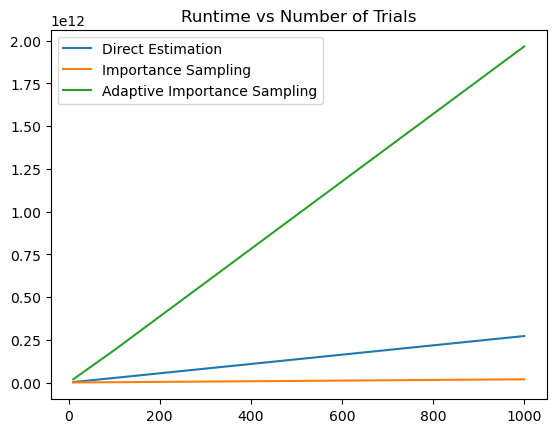

In [8]:
pyplot.plot(results_de['n'], results_de['runtime'])
pyplot.plot(results_ims['n'], results_ims['runtime'])
pyplot.plot(results_aims['n'], results_aims['runtime'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Runtime vs Number of Trials")
pyplot.show()